In [5]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))    # Add project root directory to path

import json

import matplotlib.pyplot as plt
from munch import Munch
from pandas import DataFrame
from pathlib import Path

from core.lib.converters import timestamp_to_formatted_date
from core.lib.matplotlib_utils import bar_plot
from core.lib.numpy_utils import NpEncoder

def print_as_json(data, indent=2, sort_keys=False) -> None:
    print(json.dumps(data, indent=indent, sort_keys=sort_keys, cls=NpEncoder))

def get_protocol_specific_data(df: DataFrame, summary_data: Munch) -> Munch:
    proto_data = Munch()

    proto_data.count = df.shape[0]
    proto_data.total_data = df['size'].sum()
    proto_data.packet_rate = df.shape[0] / summary_data.duration
    proto_data.avg_packet_size = proto_data.total_data / (proto_data.count or 1)

    return proto_data

In [6]:
# Specify the path to directory which contains all data.
DATA_DIR_PATH = Path.home() / 'personal/phd/projects/traffic_analysis_tools/fixtures/results'
DATA_FILE_NAME = 'results.csv'
DATA_FILE_PATH = DATA_DIR_PATH / DATA_FILE_NAME

if DATA_FILE_PATH.exists() is False:
    print('The path you specified for file containing data extracted from Pcap file does not exist, please recheck')
    exit(1)




In [7]:
import pandas as pd
# Load data file
pcap_data = pd.read_csv(str(DATA_FILE_PATH))

# Print header names
assert len(pcap_data.columns) == 81, 'Some columns are missing from csv file containing data from pcap file'

# Drop any columns which do not have any values
pcap_data = pcap_data.dropna(axis=1, how='all')
print(list(pcap_data.columns))

['timestamp', 'ref_time', 'size', 'outgoing', 'src_mac', 'dst_mac', 'eth_type', 'eth_frame_payload_size', 'src_ip', 'dst_ip', 'ip_tos', 'ip_ttl', 'ip_opts', 'ip_proto', 'ip_payload_size', 'ip6_nxt_hdr', 'ip_do_not_fragment', 'icmp_type', 'icmp_code', 'icmp_message', 'igmp_type', 'igmp_addr', 'src_port', 'dst_port', 'layer4_payload_size', 'tcp_fin_flag', 'tcp_syn_flag', 'tcp_rst_flag', 'tcp_psh_flag', 'tcp_ack_flag', 'syn_signature', 'client_os', 'layer7_proto', 'layer7_proto_name', 'dns_type', 'dns_op', 'dns_query_domain', 'dns_query_type', 'dns_query_cls', 'dns_ans_type', 'dns_ans_cname', 'dns_ans_cname_ttl', 'dns_ans_name', 'dns_ans_ip', 'dns_ans_ttl', 'arp_request_src', 'arp_src_mac', 'arp_src_ip', 'arp_dst_mac', 'arp_dst_ip', 'ntp_mode', 'ntp_interval', 'ntp_reference_id', 'ntp_stratum', 'dhcp_fingerprint', 'dhcp_vendor', 'dhcp_hostname', 'mdns_packet_type', 'upnp_packet_type', 'upnp_location', 'upnp_server', 'upnp_cache', 'upnp_uns', 'upnp_nt', 'upnp_nts']


In [8]:
# Extract summary data from trace
summary_data = Munch()
summary_data.packet_count = pcap_data.shape[0]
summary_data.start_time = pcap_data['timestamp'].iloc[0]
summary_data.stop_time = pcap_data['timestamp'].iloc[-1]
summary_data.duration = summary_data.stop_time - summary_data.start_time
summary_data.packet_rate = summary_data.packet_count / summary_data.duration
summary_data.total_data = pcap_data['size'].sum()
summary_data.data_rate = summary_data.total_data/summary_data.duration
summary_data.average_packet_size = pcap_data['size'].mean()


import json

print('Start time of trace: {}'.format(timestamp_to_formatted_date(summary_data.start_time)))
print('End time of trace: {}'.format(timestamp_to_formatted_date(summary_data.stop_time)))
print('Duration of trace: {} (seconds)'.format(summary_data.duration))
print('Total number of packets in trace: {}'.format(summary_data.packet_count))
print('Packet rate: {:.3f} (packets/second)'.format(summary_data.packet_rate))
print('Average packet size: {:.3f} (bytes)'.format(summary_data.packet_rate))
print('Total data transferred: {:.3f} (Megabytes)'.format(summary_data.total_data/1000000))
print('Data rate: {:.3f} (bytes/second)'.format(summary_data.data_rate))

Start time of trace: 2017-12-01 10:56:48
End time of trace: 2017-12-01 11:26:26
Duration of trace: 1777.5513010025024 (seconds)
Total number of packets in trace: 1600
Packet rate: 0.9001146684754656 (packets/second)
Average packet size: 0.9001146684754656 (bytes)
Total data transferred: 0.486 (Megabytes)
Data rate: 273.6838029516399 (bytes/second)


In [9]:
# Unique IP addresses
summary_data.unique_src_ip = pcap_data['src_ip'].unique()
summary_data.unique_dst_ip = pcap_data['dst_ip'].unique()
summary_data.unique_ip = set().union(summary_data.unique_src_ip, summary_data.unique_dst_ip)

print('Unique Source IPs: ')
print(summary_data.unique_src_ip)

print('Unique destination IPs: ')
print(summary_data.unique_dst_ip)

Unique Source IPs: 
['52.17.248.50' '172.10.10.171' '54.211.238.220' '52.35.17.196' nan
 '128.214.112.2' '172.10.10.1' '54.229.64.81' '52.1.151.223'
 '52.37.127.48' '54.194.162.61' '13.33.23.171' '52.52.14.174'
 '172.217.22.174' '216.58.209.106' '216.58.211.142' '34.248.240.78'
 '172.16.20.164' '172.217.22.168' '194.100.2.194' '216.58.209.136'
 '173.194.222.188' '216.58.201.170' '::' '0.0.0.0'
 'fe80::5ef8:a1ff:feb3:ca71' '172.10.10.144']
Unique destination IPs: 
['172.10.10.171' '54.211.238.220' '52.35.17.196' '52.17.248.50' nan
 '128.214.112.2' '172.10.10.1' '54.229.64.81' '52.1.151.223'
 '52.37.127.48' '54.194.162.61' '13.33.23.171' '52.52.14.174'
 '172.217.22.174' '216.58.209.106' '216.58.211.142' '34.248.240.78'
 '172.16.20.164' '172.217.22.168' '194.100.2.194' '216.58.209.136'
 '173.194.222.188' '216.58.201.170' 'ff02::16' 'ff02::1:ffb3:ca71'
 '255.255.255.255' 'ff02::2' '224.0.0.22' '224.0.0.251' '239.255.255.250']


In [10]:
# Stats for outgoing packets
summary_data.outgoing_packets_data = get_protocol_specific_data(
    df=pcap_data[pcap_data['outgoing'] == True],
    summary_data=summary_data
)
print_as_json(summary_data.outgoing_packets_data)

Munch({'count': 655, 'total_data': 77517, 'packet_rate': 0.36848444240714373, 'avg_packet_size': 118.34656488549618})


In [ ]:
# Stats for incoming packets
summary_data.incoming_packet_data = get_protocol_specific_data(
    df=pcap_data[pcap_data['outgoing'].isnull()],
    summary_data=summary_data
)
print_as_json(summary_data.incoming_packet_data)

In [ ]:
# Unique layer 3 protocols
summary_data.unique_layer3_proto = pcap_data['eth_type'].unique()
layer3_proto_data = dict()
for proto in summary_data.unique_layer3_proto:
    layer3_proto_data[proto] = get_protocol_specific_data(
        df=pcap_data[pcap_data['eth_type'] == proto],
        summary_data=summary_data
    )
summary_data.layer3_proto_data = layer3_proto_data
print_as_json(summary_data.layer3_proto_data)
summary_data.unique_ip_ttl = pcap_data['ip_ttl'].unique()

In [ ]:
# Unique layer 4 protocols
summary_data.unique_layer4_proto = pcap_data['ip_proto'].unique()
layer4_proto_data = dict()
for proto in summary_data.unique_layer4_proto:
    layer4_proto_data[proto] = get_protocol_specific_data(
        df=pcap_data[pcap_data['ip_proto'] == proto],
        summary_data=summary_data
    )
summary_data.layer4_proto_data = layer4_proto_data
print_as_json(summary_data.layer4_proto_data)

In [ ]:
# Unique layer 7 protocols
summary_data.unique_layer7_proto = pcap_data['layer7_proto_name'].unique()
layer7_proto_data = dict()
for proto in summary_data.unique_layer7_proto:
    layer7_proto_data[proto] = get_protocol_specific_data(
        df=pcap_data[pcap_data['layer7_proto_name'] == proto],
        summary_data=summary_data
    )
summary_data.layer7_proto_data = layer7_proto_data
print_as_json(summary_data.layer7_proto_data)

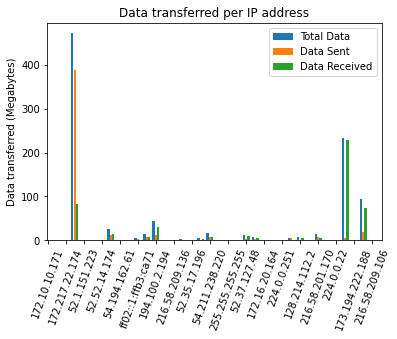

<Figure size 1008x432 with 0 Axes>

In [16]:
# Data communicated to each IP Address
unique_ip = list(summary_data.unique_ip)
ips = []
data_sent = []
total_data = []
data_received = []
for ip in summary_data.unique_ip:
    if not ip:  # Ignore NaN values
        continue
    ips.append(ip)
    temp_df = pcap_data[(pcap_data['src_ip'] == ip) | (pcap_data['dst_ip'] == ip)]
    total_data.append(temp_df['size'].sum() / 1000)
    data_sent.append(temp_df[temp_df['dst_ip'] == ip]['size'].sum() / 1000)
    data_received.append(temp_df[temp_df['src_ip'] == ip]['size'].sum() / 1000)

data = {
    "Total Data": total_data,
    "Data Sent": data_sent,
    "Data Received": data_received
}

fig, ax = plt.subplots()
bar_plot(ax, data, total_width=0.8, single_width=0.9, legend=True)
ax.set_xticklabels(ips)
ax.set_ylabel('Data transferred (Megabytes)')
ax.set_title('Data transferred per IP address')
plt.xticks(rotation=70)
plt.locator_params(axis='x', nbins=len(ips))
plt.figure(figsize=(14, 6))
plt.show()